# GP binary classification:
The homework consists of two parts:
1. Play around with a toy dataset and the scikit-learn black box GPs. This part is done to give you an intuition and ask high-level questions about Gaussian Processes, Kernels, etc. (easy part)
2. Implement a binary classification GP yourself and apply it to the toy dataset and FashionMNIST dataset (harder part)

# Toy dataset to get a feeling for binary GP classification

In [1]:
# Copied and adapted from: 
# https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpc.html#sphx-glr-download-auto-examples-gaussian-process-plot-gpc-py
# Original Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>


import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct, RationalQuadratic, ExpSineSquared

np.random.seed(42)

In [2]:
#create a toy dataset
n = 100
train_size = 50

X = np.random.uniform(0,5, n)
y = (X > 2.5).astype(int) #using bool to int casting

X_train = X[0:train_size].reshape(-1,1)
y_train = y[0:train_size]
X_test = X[train_size:n].reshape(-1,1)
y_test = y[train_size:n]

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50, 1)
y_train shape:  (50,)
X_test shape:  (50, 1)
y_test shape:  (50,)


In [3]:
# specify the kernel
RBF_kernel = 1.0 * RBF(length_scale=1.0)
Matern_kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
RationalQuadratic_kernel = 1.0 * RationalQuadratic(alpha=0.1, length_scale=1.0)
ExpSineSquared_kernel = 1.0 * ExpSineSquared(length_scale=1, periodicity=3)
DotProduct_kernel = 1 * DotProduct(sigma_0=1.0)

In [4]:
# Specify Gaussian Processes with fixed and optimized hyperparameters
gp_fix = GaussianProcessClassifier(kernel=DotProduct_kernel,
                                   optimizer=None)
gp_fix.fit(X_train, y_train)

gp_opt = GaussianProcessClassifier(kernel=DotProduct_kernel)
gp_opt.fit(X_train, y_train)

GaussianProcessClassifier(copy_X_train=True,
                          kernel=1**2 * DotProduct(sigma_0=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)

In [5]:
# plot marginal likelihoods
print("Log Marginal Likelihood (initial): %.3f"
      % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))

print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (accuracy_score(y_train, gp_fix.predict(X_train)),
         accuracy_score(y_train, gp_opt.predict(X_train))))
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (log_loss(y_train, gp_fix.predict_proba(X_train)[:, 1]),
         log_loss(y_train, gp_opt.predict_proba(X_train)[:, 1])))

Log Marginal Likelihood (initial): -19.813
Log Marginal Likelihood (optimized): -6.087
Accuracy: 0.940 (initial) 1.000 (optimized)
Log-loss: 0.261 (initial) 0.094 (optimized)


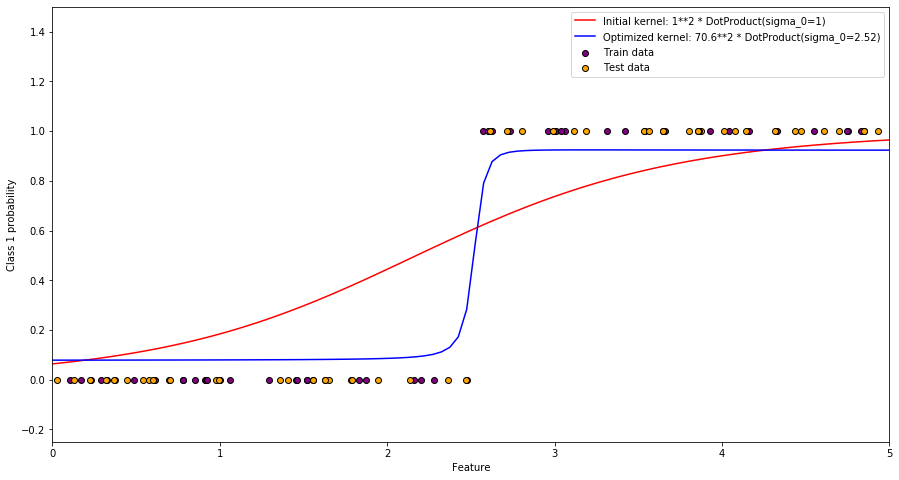

In [6]:
# Plot posteriors
plt.figure(figsize=(15,8))
plt.scatter(X_train[:, 0], y_train, c='purple', label="Train data",
            edgecolors=(0, 0, 0))
plt.scatter(X_test[:, 0], y_test, c='orange', label="Test data",
            edgecolors=(0, 0, 0))
X_ = np.linspace(0, 5, 100)
plt.plot(X_, gp_fix.predict_proba(X_[:, np.newaxis])[:, 1], 'r',
         label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(X_, gp_opt.predict_proba(X_[:, np.newaxis])[:, 1], 'b',
         label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

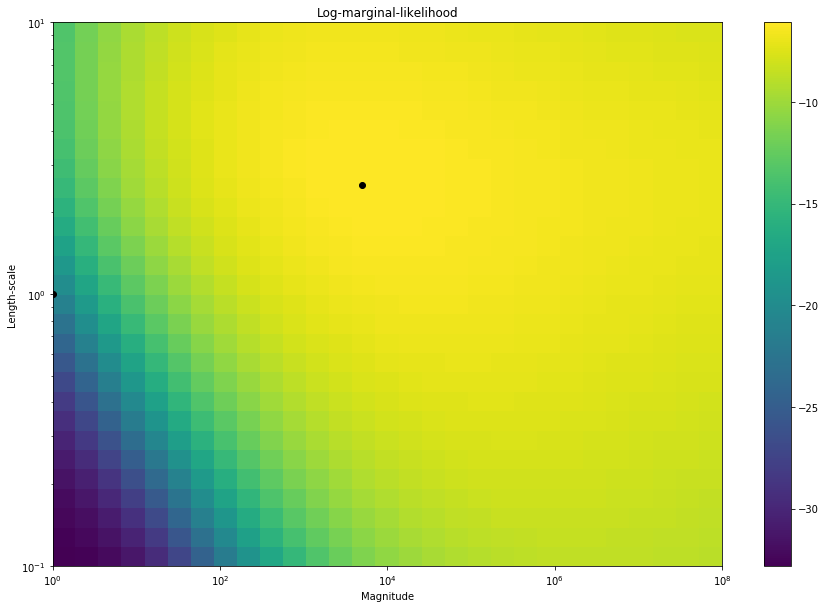

In [7]:
# Plot LML landscape
plt.figure(figsize=(15,10))
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
plt.plot(np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1],
         'ko', zorder=10)
plt.plot(np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1],
         'ko', zorder=10)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()

## High-level questions:
1. What do the blue and the red line in the posterior plot represent?
2. What is does the log-marginal-likelihood describe?

### One sentence answers are sufficient. Text is sufficient. 
1. Blue line is mean of initial kernel and red of optimized.
2. How good the parameters we optimized fit.

## Play around with the code:
1. Check out all 5 different kernels. Which one is the best fit? Is any Kernel strictly better than another?
2. Implement a different function and test it with all 5 Kernels. Is every Kernel able to fit the problem? The function can be simple, e.g. 1 if x < 1 or x > 4, 0 else. 

### 1. Different Kernels: one sentence per answer is sufficient
1.
* RBF: <br>
    Log Marginal Likelihood (initial): -17.169 <br>
    Log Marginal Likelihood (optimized): -4.625 <br>
    Accuracy: 0.980 (initial) 1.000 (optimized) <br>
    Log-loss: 0.211 (initial) 0.342 (optimized) <br>
* Matern: <br>
    Log Marginal Likelihood (initial): -17.891 <br>
    Log Marginal Likelihood (optimized): -4.565 <br>
    Accuracy: 0.980 (initial) 1.000 (optimized) <br>
    Log-loss: 0.219 (initial) 0.457 (optimized) <br>
* RationalQuadratic: <br>
    Log Marginal Likelihood (initial): -24.520 <br>
    Log Marginal Likelihood (optimized): -4.619 <br>
    Accuracy: 0.980 (initial) 1.000 (optimized) <br>
    Log-loss: 0.343 (initial) 0.367 (optimized) <br>
* ExpSineSquared: <br>
    Log Marginal Likelihood (initial): -35.058 <br>
    Log Marginal Likelihood (optimized): -4.623 <br>
    Accuracy: 0.660 (initial) 1.000 (optimized) <br>
    Log-loss: 0.631 (initial) 0.351 (optimized) <br>
* DotProduct: <br>
    Log Marginal Likelihood (initial): -19.813 <br>
    Log Marginal Likelihood (optimized): -6.087 <br>
    Accuracy: 0.940 (initial) 1.000 (optimized) <br>
    Log-loss: 0.261 (initial) 0.094 (optimized) <br>

DotProduct kernel has smalles log-loss and biggest marginal likelihood. No kernel is strictly better then the other. (e.g. accuracy comparisons)

2.
* RBF: <br>
    Log Marginal Likelihood (initial): -20.942 <br>
    Log Marginal Likelihood (optimized): -6.983 <br>
    Accuracy: 1.000 (initial) 1.000 (optimized) <br>
    Log-loss: 0.280 (initial) 0.316 (optimized) <br>
* Matern: <br>
    Log Marginal Likelihood (initial): -21.618 <br>
    Log Marginal Likelihood (optimized): -7.559 <br>
    Accuracy: 0.960 (initial) 1.000 (optimized) <br>
    Log-loss: 0.282 (initial) 0.363 (optimized) <br>
* RationalQuadratic: <br>
    Log Marginal Likelihood (initial): -29.429 <br>
    Log Marginal Likelihood (optimized): -8.295 <br>
    Accuracy: 0.960 (initial) 1.000 (optimized) <br>
    Log-loss: 0.460 (initial) 0.348 (optimized) <br>
* ExpSineSquared: <br>
    Log Marginal Likelihood (initial): -34.764 <br>
    Log Marginal Likelihood (optimized): -6.526 <br>
    Accuracy: 0.680 (initial) 1.000 (optimized) <br>
    Log-loss: 0.624 (initial) 0.280 (optimized) <br>
* DotProduct: <br>
    Log Marginal Likelihood (initial): -36.924 <br>
    Log Marginal Likelihood (optimized): -34.658 <br>
    Accuracy: 0.720 (initial) 0.460 (optimized) <br>
    Log-loss: 0.673 (initial) 0.693 (optimized) <br>
    
DotProduct kernel didn't fit the data.

### 2. Different function

X_train shape:  (50, 1)
y_train shape:  (50,)
X_test shape:  (50, 1)
y_test shape:  (50,)
Log Marginal Likelihood (initial): -20.975
Log Marginal Likelihood (optimized): -7.037
Accuracy: 0.960 (initial) 1.000 (optimized)
Log-loss: 0.279 (initial) 0.293 (optimized)


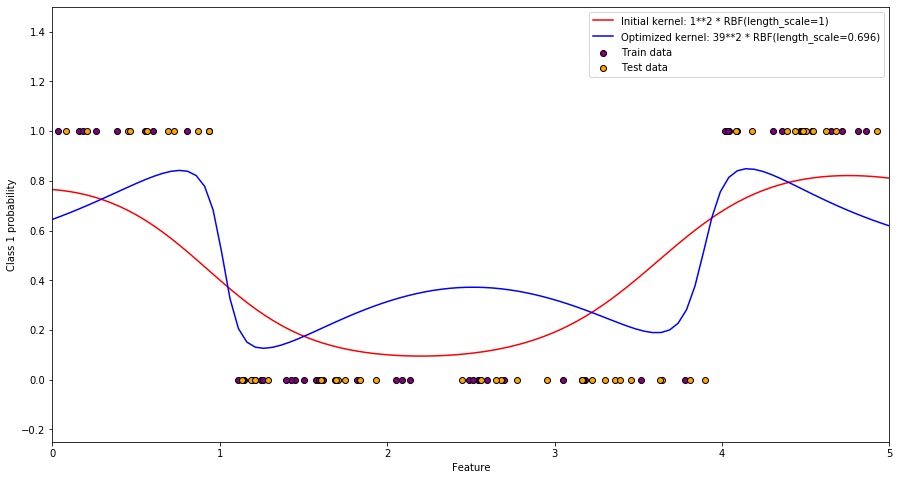

In [8]:
#Copy the the relevant parts of the code from above and plot your function with the respective kernel
n = 100
train_size = 50

X = np.random.uniform(0,5, n)
y = ((X>4) | (X<1)).astype(int)

X_train = X[0:train_size].reshape(-1,1)
y_train = y[0:train_size]
X_test = X[train_size:n].reshape(-1,1)
y_test = y[train_size:n]

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

RBF_kernel = 1.0 * RBF(length_scale=1.0)
Matern_kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
RationalQuadratic_kernel = 1.0 * RationalQuadratic(alpha=0.1, length_scale=1.0)
ExpSineSquared_kernel = 1.0 * ExpSineSquared(length_scale=1, periodicity=3)
DotProduct_kernel = 1 * DotProduct(sigma_0=1.0)

gp_fix = GaussianProcessClassifier(kernel=RBF_kernel,
                                   optimizer=None)
gp_fix.fit(X_train, y_train)

gp_opt = GaussianProcessClassifier(kernel=RBF_kernel)
gp_opt.fit(X_train, y_train)

print("Log Marginal Likelihood (initial): %.3f"
      % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))

print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (accuracy_score(y_train, gp_fix.predict(X_train)),
         accuracy_score(y_train, gp_opt.predict(X_train))))
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (log_loss(y_train, gp_fix.predict_proba(X_train)[:, 1]),
         log_loss(y_train, gp_opt.predict_proba(X_train)[:, 1])))

plt.figure(figsize=(15,8))
plt.scatter(X_train[:, 0], y_train, c='purple', label="Train data",
            edgecolors=(0, 0, 0))
plt.scatter(X_test[:, 0], y_test, c='orange', label="Test data",
            edgecolors=(0, 0, 0))
X_ = np.linspace(0, 5, 100)
plt.plot(X_, gp_fix.predict_proba(X_[:, np.newaxis])[:, 1], 'r',
         label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(X_, gp_opt.predict_proba(X_[:, np.newaxis])[:, 1], 'b',
         label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

# Part 2: implement the GP yourself

- we only consider binary classification
- Use the RBF kernel as a starter
- Do NOT use np.linalg.inv!!! By now you should know the cholesky decomposition. 
- You do NOT need to implement an optimizer for the kernel parameters. Just use the values suggested in the toy example and compare with the fixed version of the GP
- Hints: 
    1. Use the knowledge from the lecture on classification GPs with the Laplace approximation. If you want more background read up in the GP book chapter 3: http://www.gaussianprocess.org/gpml/chapters/RW3.pdf
    2. The likelihood in the lecture is calculated for binary classification with [-1, 1] labels. In this example we use [0,1] labels. Do not forget to change the likelihood accordingly before implementing it.
    3. In the GP algorithm you will have to calculate an integral. There are different methods to do that.  For a brute force approximation check out scipy.integrate.quad 
    4. Add a small value on all the diagonal terms, i.e. Kernel + 1e-6*np.eye(X_train.shape[0]). Why is this useful? <br>
        Answer: To reduce conditioning and stabilize optimization.

In [11]:
from scipy.linalg import cholesky, cho_solve
from scipy.integrate import quad
from scipy.spatial.distance import cdist

class GPClassifier():
    def __init__(self, X, Y, kernel):
        self.X = X
        self.Y = Y
        self.n = Y.shape[0]
        self.kernel = kernel
        self.f_hat = None
    
    def _sigm(self, x):
        return 1/(1+np.exp(-x))
    
    def _norm(self, x, m, s):
        return np.exp(-(x-m)**2/s/2)/np.sqrt(2*np.pi)
    
    def _like(self, f):
        return np.sum(-np.log(1+np.exp(-self.Y*f)))
    
    def _likeGrad(self, f):
        return self.Y - self._sigm(f) 
    
    def _likeHess(self, f):
        return -self._sigm(f)*(1-self._sigm(f))
        
    def optimize(self, eps=1e-4):
        f = np.zeros_like(self.Y)
        K = self.kernel.eval(self.X, self.X) + 1e-8*np.eye(self.n)
        converged = False
        obj = self._like(f)
        
        while not converged:
            W = -self._likeHess(f)
            W_pow = np.expand_dims(np.sqrt(W),axis=-1)
            L = cholesky(np.eye(self.n)+(W_pow*W_pow.T)*K, lower=True)
            b = W*f + self._likeGrad(f)
            a = b - W_pow.squeeze()*cho_solve((L, True), (W_pow*K)@b)
            f = K @ a
            
            obj_n = -0.5*np.sum(a*f) + self._like(f)
            diff = np.abs(obj_n - obj)
            converged = diff < eps         
            obj = obj_n
            
            print(f'Iteration done diff: {diff} {"" if converged else "not"} converged.')
            
        return f
    
    def _int_f(self, z, f_m, f_s):
        return self._sigm(z)*self._norm(z, f_m, f_s)
            
    def predict(self, x):
        if self.f_hat is None:
            self.f_hat = self.optimize()
        K = self.kernel.eval(self.X, self.X)
        k = self.kernel.eval(self.X, x)
        W = -self._likeHess(self.f_hat)
        W_pow = np.expand_dims(np.sqrt(W),axis=-1)
        L = cholesky(np.eye(self.n)+(W_pow*W_pow.T)*K, lower=True)
        f_m = k.T @ self._likeGrad(self.f_hat)
        v = cho_solve((L, True), W_pow*k)
        f_s = np.diag(self.kernel.eval(x, x) - np.sum(v*v,axis=0))
        pred = np.array([quad(self._int_f, -np.inf, np.inf, (f_m[i], f_s[i]))[0] for i in np.arange(x.shape[0])])
        
        return pred
        
        

## Testcase 1: reuse the framework from the toy example
- make sure that you get similar results to the scikit-learn off-the-shelf GP
- implement one additional Kernel (Matern, DotProduct, RationalQuadratic, ExpSineSquared or another one you choose yourself)

In [26]:
class RBF:
    def __init__(self, l):
        self.l = l
        
    def eval(self, x1, x2):
#         return np.exp(-(x1-x2.T)**2/(2*self.l**2))
        return np.exp(-cdist(x1,x2,'sqeuclidean')/(2*self.l**2))

class DotProduct:
    def __init__(self, s):
        self.s = s
        
    def eval(self, x1, x2):
#         return x1*x2.T + self.s**2
        return 1e-3*(np.inner(x1,x2) + self.s**2)

In [14]:
kernel = RBF(0.1)
# kernel = DotProduct(3)
cl = GPClassifier(X_train, y_train, kernel)
# cl.optimize()
print(X_test.shape)
pred=cl.predict(X_test)
print(np.sum((pred>0.5) == y_test)/y_test.shape[0])

(50, 1)
Iteration done diff: 1.2802922436070006 not converged.
Iteration done diff: 0.27660315664354584 not converged.
Iteration done diff: 0.0018361090606759944 not converged.
Iteration done diff: 1.0230940006294986e-07  converged.
0.98


## Testcase 2: Fashion MNIST Tshirt vs trousers
- we use class 0 (Tshirt/top) and class 1 (trousers) as the two classes for the binary classification
- The nasty data wrangling stuff has already been done for you
- we use the first 5000 samples to train our kernel
- your task is to apply your own implementation to this dataset and report your results

In [16]:
import torch, torchvision
import torchvision.transforms as transforms
torch.manual_seed(42)

In [17]:
# data wrangling: get the first two classes for FMNIST
FMNIST_transform = transforms.Compose([
    transforms.ToTensor(),
])


FMNIST_train = torchvision.datasets.FashionMNIST(
        '~/data/fmnist',
        train=True,
        download=True,
        transform=FMNIST_transform)


FMNIST_test = torchvision.datasets.FashionMNIST(
        '~/data/fmnist',
        train=False,
        download=True,
        transform=FMNIST_transform)

def get_subset_FMNIST(classes=[0,1], dataset=FMNIST_train):
    
    dataset.targets = dataset.targets.clone().detach()
    idx = torch.zeros(dataset.targets.size()).byte()
    for c in classes:
        idx += (dataset.targets==c).byte()
    dataset.targets= dataset.targets[idx]
    dataset.data = dataset.data[idx.numpy().astype(np.bool)]
    
    #remap all classes to list of ints starting at 1
    map_dict = dict()
    for i, c in enumerate(classes):
        map_dict[c] = i
    
    for i, t in enumerate(dataset.targets):
        dataset.targets[i] = map_dict[t.item()]
    
    return(dataset.data, dataset.targets)

classes = [0,1]
FMNIST_train.data, FMNIST_train.targets = get_subset_FMNIST(classes=classes, dataset=FMNIST_train)
FMNIST_test.data, FMNIST_test.targets = get_subset_FMNIST(classes=classes, dataset=FMNIST_test)
print(len(FMNIST_train.targets))
print(FMNIST_train.targets[:10])
print(len(FMNIST_test.targets))
print(FMNIST_test.targets[:10])

12000
tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 1])
2000
tensor([1, 1, 1, 1, 0, 1, 0, 0, 1, 1])


/opt/conda/conda-bld/pytorch_1579040055865/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_1579040055865/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.


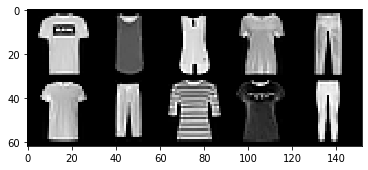

In [18]:
# have a look at them to verify they are only 
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #plt.imshow(npimg)
    plt.show()

images = FMNIST_train.data[:10].view(10, 1, 28, 28)
imshow(torchvision.utils.make_grid(images, nrow=5))

In [22]:
# further data wrangling
X_train = FMNIST_train.data[:5000].view(-1, 28*28)
print(X_train.shape)
y_train = FMNIST_train.targets[:5000].view(-1)
print(y_train[:10])

X_test = FMNIST_test.data.view(-1, 28*28)
print(X_test.shape)
y_test = FMNIST_test.targets.view(-1)
print(y_test[:10])

#normalize the data between [-1,1]
X_train = (X_train.float() - 128) / 128
X_test = (X_test.float() - 128) / 128

X_train, X_test = X_train.numpy(), X_test.numpy()
y_train, y_test = y_train.numpy(), y_test.numpy()

torch.Size([5000, 784])
tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 1])
torch.Size([2000, 784])
tensor([1, 1, 1, 1, 0, 1, 0, 0, 1, 1])


In [28]:
#The nasty data wrangling stuff has been done for you. 
#TODO: test which kernel works for this problem?
#Dot product works better then RBF (it couldn't fit as good as DotProduct)
# kernel = RBF(0.1)
kernel = DotProduct(1)
cl = GPClassifier(X_train, y_train, kernel)
# cl.optimize()
print(X_test.shape)
pred=cl.predict(X_test)
print(np.sum((pred>0.5) == y_test)/y_test.shape[0])

(2000, 784)
Iteration done diff: 1137.4420478750685 not converged.
Iteration done diff: 142.46589147583927 not converged.
Iteration done diff: 14.222774244433822 not converged.
Iteration done diff: 7.670761725365992 not converged.
Iteration done diff: 1.1352406597366098 not converged.
Iteration done diff: 0.009140051980011776 not converged.
Iteration done diff: 2.1799769456265494e-07  converged.
0.964
